# Comparison between CAMBLIB used in previous runs, and what's computed by CAMB

### Comment:

I have found differences in the BB spectra stored in the ${\it camblib}$ library, comparing with the spectra I compute with CAMB. Although the cosmological parameters are apparently the same, the shape of the BB spectra differ.


## Input data: Cl's

In [1]:
from __future__ import division

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "/home/claudia/TRABAJO/INVESTIGACION/MontePython/montepython_public/montepython/likelihoods/QUBIC_Like/")

import scipy.constants

import numpy as np   #--> este lo uso
from qubic import QubicInstrument
from pysimulators import FitsArray    #--> este lo uso

import qubic_util

%matplotlib inline

In [2]:
import scipy.interpolate as interp


# Spectrum of $C_\ell^{BB}$ (CMB)

In [ ]:
##Reference... The CAMB library was computed with this code... I think!!
#H0 = 67.04
#			omegab = 0.022032
#			omegac = 0.12038
#			h2 = (H0/100.)**2
#scalar_amp = np.exp(3.098)/1.E10
#			omegav = h2 - omegab - omegac
#			Omegab = omegab/h2
#			Omegac = omegac/h2
#			params = {'H0':H0,'omegab':Omegab,'omegac':Omegac,'omegak':0,'scalar_index':0.9624,'reion__use_optical_depth':True,'reion__optical_depth':0.0925,'tensor_ratio':rvalue,'WantTensors':True,'scalar_amp':scalar_amp,'DoLensing':True}
#			lmaxcamb = np.max(lll)
#			T,E,B,X = pycamb.camb(lmaxcamb+1+150,**params)
#			B=B[:lmaxcamb+1]


### Trying to reproduce CAMB library with CAMB:

I choose the same cosmological parameters (although the output is rather different from the CAMB library, and I guess there are still some parameters which differ from those used to compute the library originally).

I choose a value of $r$ equal to 0.1

In [3]:
import camb

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
#pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)  ##Standard values!!
pars.set_cosmology(H0=67.04, ombh2=0.022032, omch2=0.12038, mnu=0., omk=0, tau=0.0925)  #Values from camblib

pars.WantTensors = True

#pars.InitPower.set_params(As=2e-9, ns=0.965, r=0.1)  #Standard values
pars.InitPower.set_params(As=np.exp(3.098)/1.E10, ns=0.9624, r=0.1)
#pars.set_for_lmax(2500, lens_potential_accuracy=0);
pars.set_for_lmax(4000, lens_potential_accuracy=0);

results = camb.get_results(pars)

powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)



total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


(4051, 4)


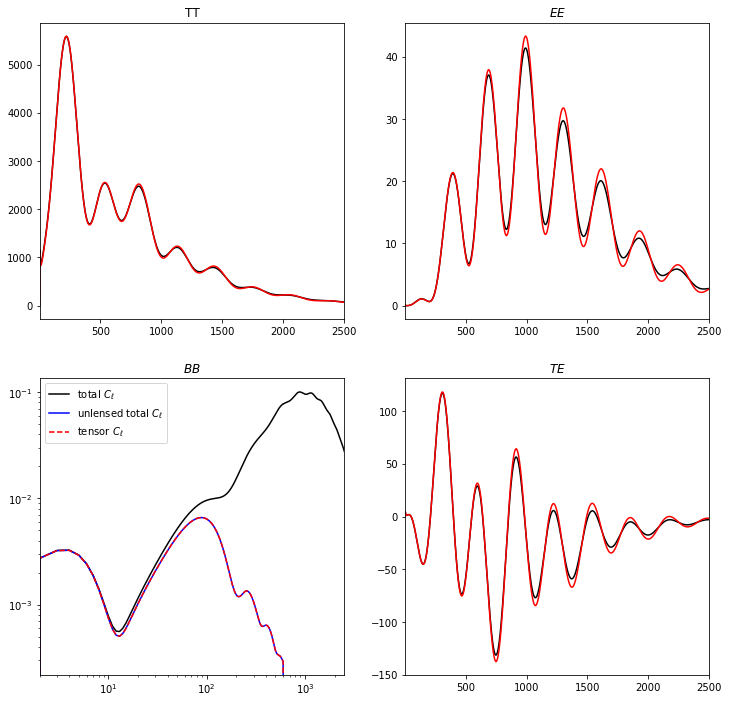

In [4]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
unlensedtotalCL=powers['unlensed_total']
tensorCL=powers['tensor']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='r')
ax[0,0].set_title('TT')
ax[0,1].plot(ls,totCL[:,1], color='k')
ax[0,1].plot(ls,unlensedCL[:,1], color='r')
ax[1,0].set_title(r'$BB$')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
#ax[1,0].plot(ls,unlensedtotalCL[:,2], color='k')
ax[1,0].plot(ls,totCL[:,2], color='k', label='total $C_\ell$')
ax[1,0].plot(ls,unlensedtotalCL[:,2], color='b', label='unlensed total $C_\ell$')#, ls='--' )
ax[1,0].plot(ls,tensorCL[:,2], color='r', ls='--', label='tensor $C_\ell$')
ax[1,0].legend()
ax[0,1].set_title(r'$EE$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='r')
ax[1,1].set_title(r'$TE$');
for ax in ax.reshape(-1): ax.set_xlim([2,2500]);



### CAMB library:

In the CAMB library, there are $C_\ell^{BB}$ stored, for different values of $r$. 

In [5]:
root='/home/claudia/TRABAJO/INVESTIGACION/MontePython/montepython_public/data/QUBIC/DualBand/'

filenameCl='camblib600_nolensing_cl.fits'
filenameEll='camblib600_nolensing_ell.fits'
filenameR='camblib600_nolensing_r.fits'

ellcamblib = FitsArray(root+filenameEll)
rcamblib = FitsArray(root+filenameR)
clcamblib = FitsArray(root+filenameCl)
camblib = [ellcamblib, rcamblib, clcamblib]



Interpolate among values in the library:

In [6]:
#Interpolate for different values of r, in the library:
lll = camblib[0]
bla = interp.RectBivariateSpline(lll,camblib[1],camblib[2])

#r=0.1

r=[0., 0.04, 0.08, 0.1, 0.12, 0.16]

ClBB_r=[]

for i in r:
    ClBB_r.append(np.ravel(bla(lll, i))*(lll*(lll+1))/(2*np.pi))
  


Plot some values in the CAMBLIB, together with the computation by CAMB:

values of r= [0.04, 0.08, 0.1, 0.12, 0.16]


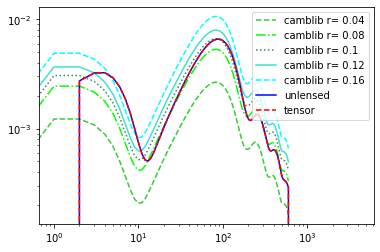

In [7]:
#colorlist= ['magenta','plum','violet','purple','darkviolet','deeppink']
colorlist= ['forestgreen','limegreen','lime','seagreen','turquoise','aqua']

linestyles = ['-', '--', '-.', ':','-', '--']

labellist=['camblib r= '+str(s) for s in r]


print('values of r=', r[1:])
    
for i in range(1,len(r)):
    plt.plot(lll,ClBB_r[i], label=labellist[i], color=colorlist[i],ls=linestyles[i])
plt.plot(ls,unlensedtotalCL[:,2], color='b', label='unlensed')
plt.plot(ls,tensorCL[:,2], color='r', ls='--',label='tensor')
plt.yscale("log")
plt.xscale("log")
plt.legend(loc='upper right');



The preliminar conclusion is that in CAMBLIB there is the BB tensor spectrum (or total unlensed spectrum). The difference between the spectra in the library and the spectra computed with CAMB should be a different set of cosmological parameters. Although I tried to use the same set of parameters, I might be missing something.

Below, I tried different values of $r$ (the same as above), and different values of $n_s$ (I don't see any difference in this latter case).


In [8]:
#rs = np.linspace(0,0.2,6)
#print(rs)

[0.   0.04 0.08 0.12 0.16 0.2 ]


#### Total BB spectra (tensor + lensing):

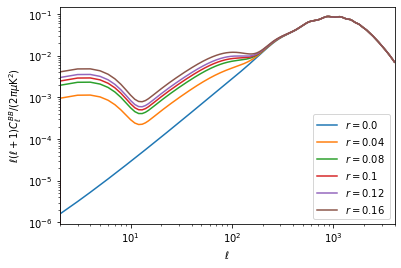

In [10]:
#I compute the total BB spectra (tensor + lensing) for different values of r:

from camb import model, initialpower

#You can calculate spectra for different primordial power spectra without recalculating everything
#for example, let's plot the BB spectra as a function of r
pars.set_for_lmax(4000, lens_potential_accuracy=1)
pars.WantTensors = True
results = camb.get_transfer_functions(pars)
lmax=4000
#rs = np.linspace(0,0.2,6)
rs=[0., 0.04, 0.08, 0.1, 0.12, 0.16]
for r in rs:
    inflation_params = initialpower.InitialPowerLaw()
    inflation_params.set_params(ns=0.9624, r=r)  #As=np.exp(3.098)/1.E10, ns=0.9624, r=0.1
    results.power_spectra_from_transfer(inflation_params) #warning OK here, not changing scalars
    cl = results.get_total_cls(lmax, CMB_unit='muK')
    plt.loglog(np.arange(lmax+1),cl[:,2])
plt.xlim([2,lmax])
plt.legend(["$r = %s$"%r for r in  rs], loc='lower right');
plt.ylabel(r'$\ell(\ell+1)C_\ell^{BB}/ (2\pi \mu{\rm K}^2)$')
plt.xlabel(r'$\ell$');

#### Total unlensed BB spectra (tensor - no lensing). Varying $r$:

/home/claudia/miniconda3/envs/qubic_env/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


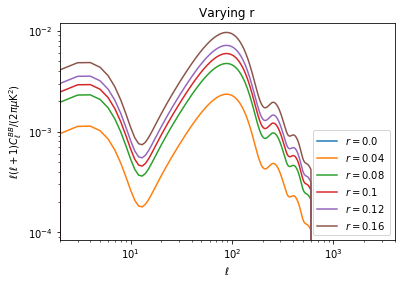

In [11]:
#I compute the total unlensed BB spectra (i.e.: tensor) for different values of r:
#Varying r:

from camb import model, initialpower

#You can calculate spectra for different primordial power spectra without recalculating everything
#for example, let's plot the BB spectra as a function of r
pars.set_for_lmax(4000, lens_potential_accuracy=1)
pars.WantTensors = True
results = camb.get_transfer_functions(pars)
lmax=4000
#rs = np.linspace(0,0.2,6)
rs=[0., 0.04, 0.08, 0.1, 0.12, 0.16]
for r in rs:
    inflation_params = initialpower.InitialPowerLaw()
    inflation_params.set_params(ns=0.9624, r=r)  #As=np.exp(3.098)/1.E10, ns=0.9624, r=0.1
    results.power_spectra_from_transfer(inflation_params) #warning OK here, not changing scalars
    cl = results.get_unlensed_total_cls(lmax, CMB_unit='muK')
    plt.loglog(np.arange(lmax+1),cl[:,2])
plt.xlim([2,lmax])
plt.legend(["$r = %s$"%r for r in  rs], loc='lower right');
plt.ylabel(r'$\ell(\ell+1)C_\ell^{BB}/ (2\pi \mu{\rm K}^2)$')
plt.xlabel(r'$\ell$')
plt.title('Varying r');

#### Total unlensed BB spectra (tensor - no lensing). Varying $n_s$:

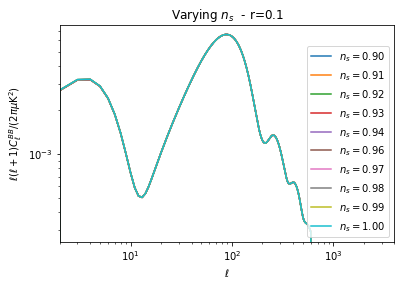

In [12]:
#Varying ns. We see that the BB spectra don't change:

from camb import model, initialpower

#You can calculate spectra for different primordial power spectra without recalculating everything
#for example, let's plot the BB spectra as a function of r
pars.set_for_lmax(4000, lens_potential_accuracy=1)
pars.WantTensors = True
results = camb.get_transfer_functions(pars)
lmax=4000

nss= np.linspace(0.9,1.0,10)

for n in nss:
    inflation_params = initialpower.InitialPowerLaw()
    inflation_params.set_params(As=np.exp(3.098)/1.E10, ns=n, r=0.1)  #As=np.exp(3.098)/1.E10, ns=0.9624, r=0.1
    results.power_spectra_from_transfer(inflation_params) #warning OK here, not changing scalars
    cl = results.get_unlensed_total_cls(lmax, CMB_unit='muK')
    plt.loglog(np.arange(lmax+1),cl[:,2])
plt.xlim([2,lmax])
plt.legend(["$n_s = %.2f$"%n for n in  nss], loc='lower right');
plt.ylabel(r'$\ell(\ell+1)C_\ell^{BB}/ (2\pi \mu{\rm K}^2)$')
plt.xlabel(r'$\ell$')
plt.title('Varying $n_s$  - r=0.1');